<a href="https://colab.research.google.com/github/gibeom92/dispersion_PINN/blob/master/1D_dispersion_FDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [ ]:
L = 10  # Length/2 of domain
N = 200  # Number of discretization points
dx = L*2/N  # 0.1
dt = 0.0001
T = 1000    # calculate 1000 times with dt=0.0001s

K = 5   # diffusion coefficient
u = 5   # wind profile

In [ ]:
x = np.arange(-L, L, dx)  # Define x domain

# Initial condition
C_0 = 1 / np.cosh(10 * x)

# FDM coefficient
A = (2*dt*K - dx*dt*u) / (2*dx**2)
B = (2*dx**2 - 4*dt*K) / (2*dx**2)
C = (2*dt*K + dx*dt*u) / (2*dx**2)

In [ ]:
temp = C_0.copy()
temp2 = C_0.copy()
for i in range(T):
  for j in range(len(x)-1):
    temp2[j] = A * temp[j+1] + B * temp[j] + C * temp[j-1]
  temp2[-1] = A * temp[0] + B * temp[-1] + C * temp[-2]
  C_0 = np.vstack([C_0, temp2])
  temp = temp2

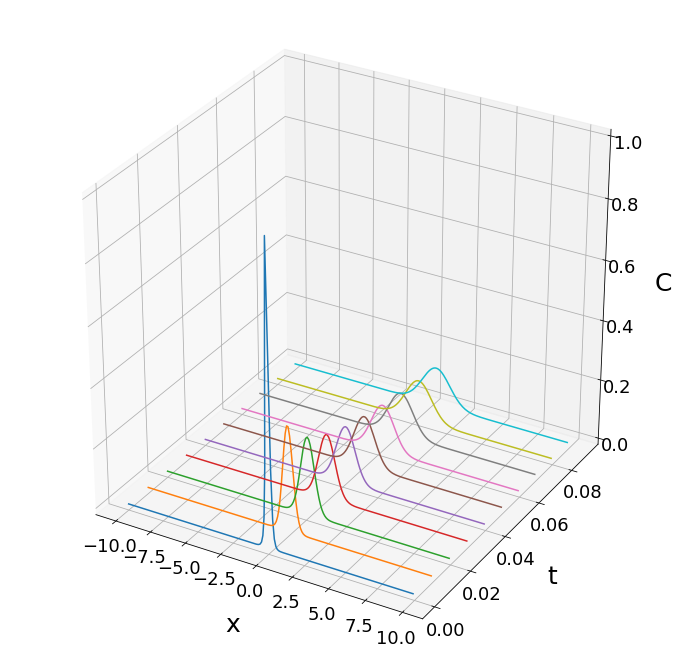

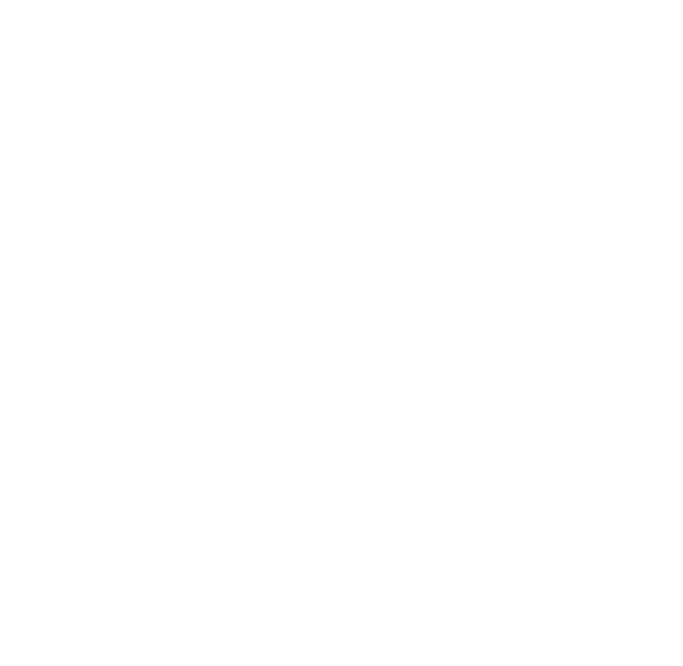

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})
fsize = 25

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

C_plot = C_0[0:1000:100, :]
for j in range(C_plot.shape[0]):
    ys = j * np.ones(C_plot.shape[1]) * 0.01
    ax.plot(x, ys, C_plot[j, :])
    ax.set_xlabel('x', size=fsize, labelpad=20)                                
    ax.set_ylabel('t', size=fsize, labelpad=20)                            
    ax.set_zlabel('C', size=fsize, labelpad=20) 

# Image plot
plt.figure()
#plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.DataFrame(C_plot)
df.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/Dispersion/FDM.xlsx')